In [19]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_contour

import lightgbm as lgbm
from catboost import CatBoostClassifier



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_regression



from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
import mlflow
import utils
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator





from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



PATH = '/Users/mimi/Desktop/PYTHON/TURING/HOME/MachLearning/S2/data/archive (1).zip'

df = pd.read_csv(PATH)
df.drop(columns='id', inplace=True)
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)


imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()


df['bmi'] = imputer.fit_transform(df[['bmi']])

cols_to_convert = ['hypertension','heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in df.columns:
    if col in cols_to_convert:
        df[col] = pd.Categorical(df[col])
        encoding = df[col].value_counts(normalize=True)
        df[col + '_freq'] = df[col].map(encoding).astype(float)

mean_features = df.groupby('age')[['avg_glucose_level', 'bmi']].transform('mean')
mean_features.columns = ['mean_glucose_level', 'mean_bmi']

df = pd.concat([df, mean_features], axis=1)
for colname in df.select_dtypes("category"):
    df[colname], _ = df[colname].factorize()



X = df.drop(columns='stroke')
y = df['stroke']
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# feature reduction

In [10]:
from sklearn.decomposition import PCA

features = StandardScaler().fit_transform(df)
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 20
Reduced number of features: 13


In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns

features = StandardScaler().fit_transform(df[numeric_columns])

pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)

component_names = [f"PC{i+1}" for i in range(features_pca.shape[1])]

print("Original number of features:", len(numeric_columns))
print("Reduced number of features (components):", features_pca.shape[1])
print("Names of components:", component_names)

Original number of features: 20
Reduced number of features (components): 13
Names of components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']


In [12]:
features_pca

array([[ 1.85902339,  2.93300986, -0.90756566, ...,  1.59823495,
        -2.31954384,  0.91742459],
       [ 0.71936709,  0.10673035,  0.73495923, ...,  1.19276155,
        -1.78814346, -0.83475364],
       [ 1.56303551,  2.64487493,  1.06482221, ...,  2.26037875,
        -0.90825477,  0.91771654],
       ...,
       [-0.1027442 , -0.77780051,  0.86177559, ...,  0.77110995,
        -1.36394357, -0.28850555],
       [ 0.80643288,  0.01710261,  1.17750908, ..., -1.65880018,
        -0.78438991, -0.05822985],
       [-0.31137562, -0.38465115, -1.17765647, ...,  0.72532334,
        -0.71973181, -1.54334442]])

# other stuff

In [ ]:
from sklearn.feature_selection import mutual_info_regression


In [ ]:
X.dtypes

In [ ]:
df.dtypes != int

In [13]:
for colname in X.select_dtypes("category"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int


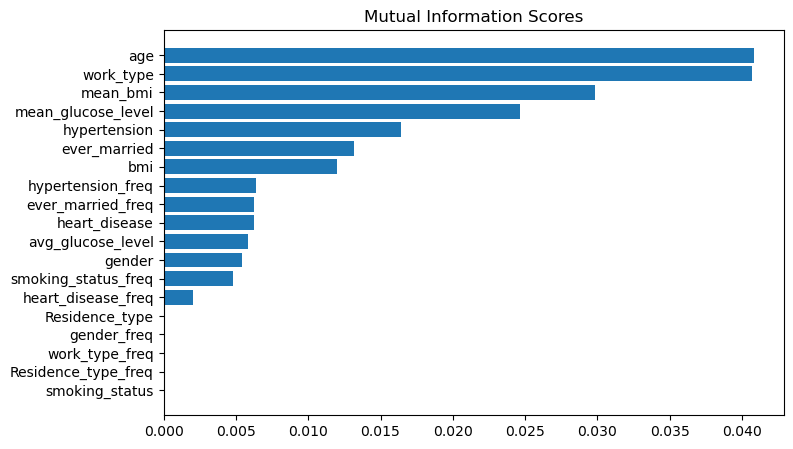

In [14]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

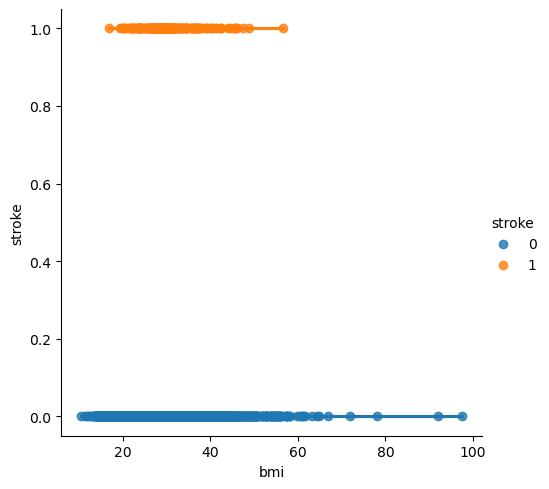

In [15]:
sns.lmplot(x="bmi", y="stroke", hue="stroke", data=df)

In [ ]:
df.columns

In [ ]:
sns.kdeplot(df.smoking_status_freq, fill=True)


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.shape

(5109, 4)

Classifiers:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packag

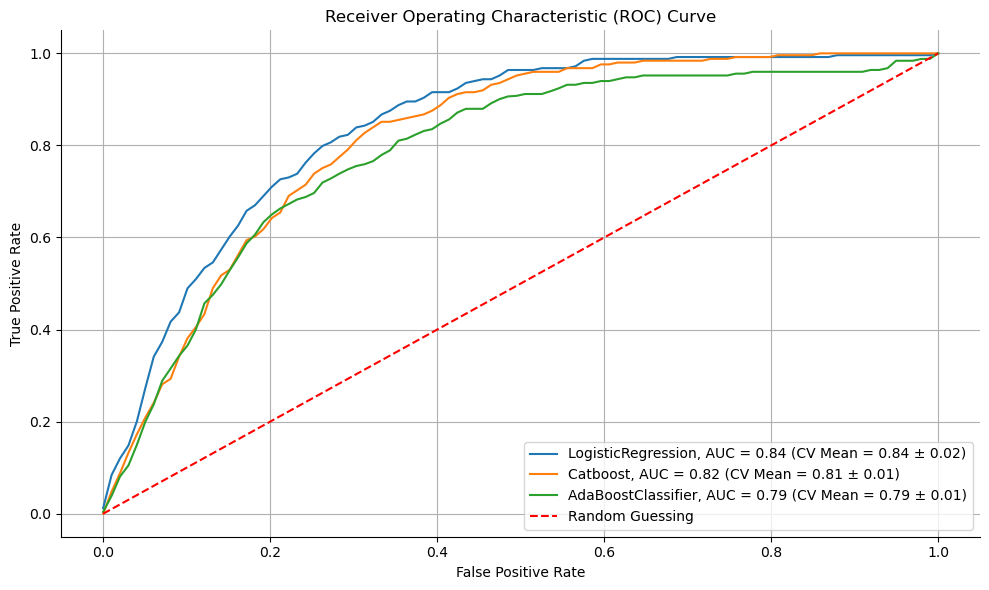

In [18]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = '/Users/mimi/Desktop/PYTHON/TURING/HOME/MachLearning/S2/data/archive (1).zip'

df = pd.read_csv(PATH)
df.drop(columns='id', inplace=True)
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)


imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()


df['bmi'] = imputer.fit_transform(df[['bmi']])

cols_to_convert = ['hypertension','heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in df.columns:
    if col in cols_to_convert:
        df[col] = pd.Categorical(df[col])
        encoding = df[col].value_counts(normalize=True)
        df[col + '_freq'] = df[col].map(encoding).astype(float)

mean_features = df.groupby('age')[['avg_glucose_level', 'bmi']].transform('mean')
mean_features.columns = ['mean_glucose_level', 'mean_bmi']

df = pd.concat([df, mean_features], axis=1)
for colname in df.select_dtypes("category"):
    df[colname], _ = df[colname].factorize()



X = df.drop(columns='stroke')
y = df['stroke']



from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)





clfs = {
    "SVC": SVC(probability=True),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    #"KNeighborsClassifier": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(verbosity=0, use_label_encoder=False),
    #"LightGBM": lgb.LGBMClassifier(),
    "Catboost": CatBoostClassifier(verbose=False),
}

models = {}  
mean_fpr = np.linspace(0, 1, 100)

results_list = []
for clf_name, clf in tqdm(clfs.items(), desc="Classifiers"):
    fold_auc_scores = []
    fold_precision_scores = []
    fold_recall_scores = []
    fold_f1_scores = []
    tprs = []
    aucs = []
    conf_mats = []  

    for train_index, test_index in tqdm(stratified_kfold.split(X_pca, y), desc="Fold", leave=False):
        X_train, X_test = X_pca.iloc[train_index], X_pca.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train)
        
        if isinstance(clf, KNeighborsClassifier):
            # KNeighborsClassifier does not have predict_proba, so we need to calculate probabilities manually
            y_pred_proba = np.array([np.mean(y_train[train_neighbors] == 1) for train_neighbors in clf.kneighbors(X_test)[1]])
        else:
            if hasattr(clf, "predict_proba"):
                y_pred_proba = clf.predict_proba(X_test)[:, 1]
            else:
                y_pred_proba = clf.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

        auc_score = roc_auc_score(y_test, y_pred_proba)
        fold_auc_scores.append(auc_score)
        
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        fold_precision_scores.append(precision_score(y_test, clf.predict(X_test)))
        fold_recall_scores.append(recall_score(y_test, clf.predict(X_test)))
        fold_f1_scores.append(f1_score(y_test, clf.predict(X_test)))
        
        y_pred = clf.predict(X_test)
        conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
        conf_mats.append(conf_mat)

    mean_auc_score = np.mean(fold_auc_scores)
    std_auc_score = np.std(fold_auc_scores)
    mean_tpr = np.mean(tprs, axis=0)
    mean_roc_auc = auc(mean_fpr, mean_tpr)
    mean_precision = np.mean(fold_precision_scores)
    mean_recall = np.mean(fold_recall_scores)
    mean_f1 = np.mean(fold_f1_scores)
    mean_conf_mat = np.mean(conf_mats, axis=0)  

    models[clf_name] = clf

    results_list.append({'Classifier': clf_name, 
                         'Mean AUC': mean_auc_score, 
                         'Std AUC': std_auc_score,
                         'Mean Precision': mean_precision,
                         'Mean Recall': mean_recall,
                         'Mean F1': mean_f1,
                         'Mean TPR': mean_tpr, 
                         'Mean ROC AUC': mean_roc_auc, 
                         'Mean Confusion Matrix': mean_conf_mat})

results_df = pd.DataFrame(results_list)

sorted_results_df = results_df.sort_values(by='Mean AUC', ascending=False)

top_3_models_df = sorted_results_df.head(3)

plt.figure(figsize=(10, 6))
for _, row in top_3_models_df.iterrows():
    clf_name = row['Classifier']
    mean_auc = row['Mean AUC']
    std_auc = row['Std AUC']
    mean_tpr = row['Mean TPR']
    mean_roc_auc = row['Mean ROC AUC']
    
    plt.plot(mean_fpr, mean_tpr, label=f"{clf_name}, AUC = {mean_roc_auc:.2f} (CV Mean = {mean_auc:.2f} ± {std_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
sns.despine()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

In [ ]:
plot_variance(pca)

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

In [ ]:
df.head()

In [ ]:
mean_features = df.groupby('age')[['avg_glucose_level', 'bmi']].transform('mean')
mean_features.columns = ['mean_glucose_level', 'mean_bmi']

df = pd.concat([df, mean_features], axis=1)

In [ ]:
df.shape

In [2]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_contour

import lightgbm as lgbm
from catboost import CatBoostClassifier



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_regression



from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
import mlflow
import utils
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator





from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



PATH = '/Users/mimi/Desktop/PYTHON/TURING/HOME/MachLearning/S2/data/archive (1).zip'

df = pd.read_csv(PATH)
df.drop(columns='id', inplace=True)
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)


imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()


df['bmi'] = imputer.fit_transform(df[['bmi']])

cols_to_convert = ['hypertension','heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in df.columns:
    if col in cols_to_convert:
        df[col] = pd.Categorical(df[col])
        encoding = df[col].value_counts(normalize=True)
        df[col + '_freq'] = df[col].map(encoding).astype(float)

mean_features = df.groupby('age')[['avg_glucose_level', 'bmi']].transform('mean')
mean_features.columns = ['mean_glucose_level', 'mean_bmi']

df = pd.concat([df, mean_features], axis=1)
for colname in df.select_dtypes("category"):
    df[colname], _ = df[colname].factorize()



X = df.drop(columns='stroke')
y = df['stroke']
X_ready = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Classifiers:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packag

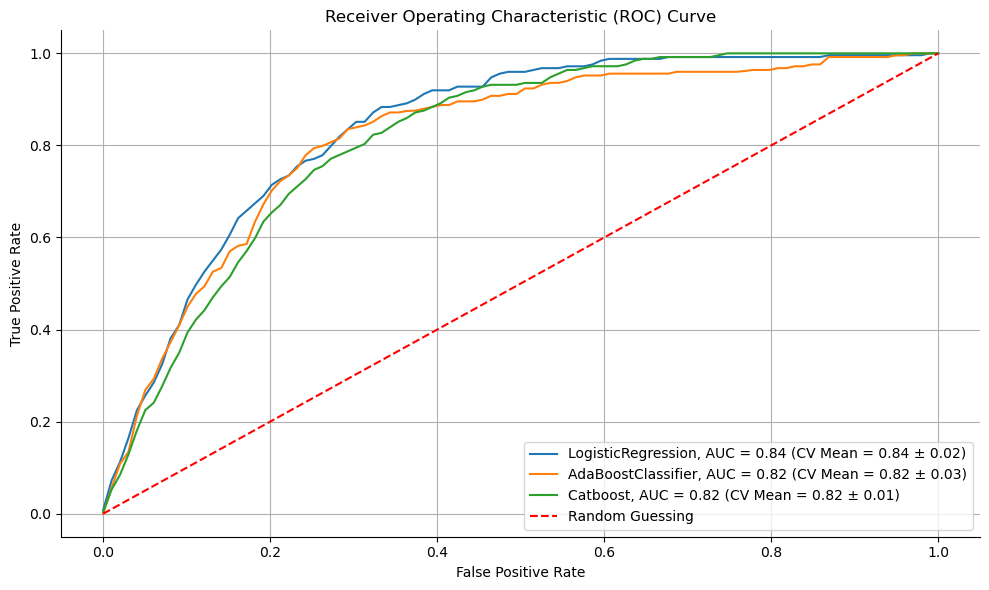

In [4]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = '/Users/mimi/Desktop/PYTHON/TURING/HOME/MachLearning/S2/data/archive (1).zip'

df = pd.read_csv(PATH)
df.drop(columns='id', inplace=True)
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)


imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()


df['bmi'] = imputer.fit_transform(df[['bmi']])

cols_to_convert = ['hypertension','heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in df.columns:
    if col in cols_to_convert:
        df[col] = pd.Categorical(df[col])
        encoding = df[col].value_counts(normalize=True)
        df[col + '_freq'] = df[col].map(encoding).astype(float)

mean_features = df.groupby('age')[['avg_glucose_level', 'bmi']].transform('mean')
mean_features.columns = ['mean_glucose_level', 'mean_bmi']

df = pd.concat([df, mean_features], axis=1)
for colname in df.select_dtypes("category"):
    df[colname], _ = df[colname].factorize()



X = df.drop(columns='stroke')
y = df['stroke']
X_ready = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

clfs = {
    "SVC": SVC(probability=True),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    #"KNeighborsClassifier": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(verbosity=0, use_label_encoder=False),
    #"LightGBM": lgb.LGBMClassifier(),
    "Catboost": CatBoostClassifier(verbose=False),
}

models = {}  
mean_fpr = np.linspace(0, 1, 100)

results_list = []
for clf_name, clf in tqdm(clfs.items(), desc="Classifiers"):
    fold_auc_scores = []
    fold_precision_scores = []
    fold_recall_scores = []
    fold_f1_scores = []
    tprs = []
    aucs = []
    conf_mats = []  

    for train_index, test_index in tqdm(stratified_kfold.split(X_ready, y), desc="Fold", leave=False):
        X_train, X_test = X_ready.iloc[train_index], X_ready.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train)
        
        if isinstance(clf, KNeighborsClassifier):
            # KNeighborsClassifier does not have predict_proba, so we need to calculate probabilities manually
            y_pred_proba = np.array([np.mean(y_train[train_neighbors] == 1) for train_neighbors in clf.kneighbors(X_test)[1]])
        else:
            if hasattr(clf, "predict_proba"):
                y_pred_proba = clf.predict_proba(X_test)[:, 1]
            else:
                y_pred_proba = clf.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

        auc_score = roc_auc_score(y_test, y_pred_proba)
        fold_auc_scores.append(auc_score)
        
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        fold_precision_scores.append(precision_score(y_test, clf.predict(X_test)))
        fold_recall_scores.append(recall_score(y_test, clf.predict(X_test)))
        fold_f1_scores.append(f1_score(y_test, clf.predict(X_test)))
        
        y_pred = clf.predict(X_test)
        conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
        conf_mats.append(conf_mat)

    mean_auc_score = np.mean(fold_auc_scores)
    std_auc_score = np.std(fold_auc_scores)
    mean_tpr = np.mean(tprs, axis=0)
    mean_roc_auc = auc(mean_fpr, mean_tpr)
    mean_precision = np.mean(fold_precision_scores)
    mean_recall = np.mean(fold_recall_scores)
    mean_f1 = np.mean(fold_f1_scores)
    mean_conf_mat = np.mean(conf_mats, axis=0)  

    models[clf_name] = clf

    results_list.append({'Classifier': clf_name, 
                         'Mean AUC': mean_auc_score, 
                         'Std AUC': std_auc_score,
                         'Mean Precision': mean_precision,
                         'Mean Recall': mean_recall,
                         'Mean F1': mean_f1,
                         'Mean TPR': mean_tpr, 
                         'Mean ROC AUC': mean_roc_auc, 
                         'Mean Confusion Matrix': mean_conf_mat})

results_df = pd.DataFrame(results_list)

sorted_results_df = results_df.sort_values(by='Mean AUC', ascending=False)

top_3_models_df = sorted_results_df.head(3)

plt.figure(figsize=(10, 6))
for _, row in top_3_models_df.iterrows():
    clf_name = row['Classifier']
    mean_auc = row['Mean AUC']
    std_auc = row['Std AUC']
    mean_tpr = row['Mean TPR']
    mean_roc_auc = row['Mean ROC AUC']
    
    plt.plot(mean_fpr, mean_tpr, label=f"{clf_name}, AUC = {mean_roc_auc:.2f} (CV Mean = {mean_auc:.2f} ± {std_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
sns.despine()
plt.show()
